In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
#Label encoding for gender column
gender_encoder = LabelEncoder()
df['gender'] = gender_encoder.fit_transform(df['gender'])

In [6]:
#Label encodung for ever_married column
married_encoder=LabelEncoder()
df['ever_married'] = married_encoder.fit_transform(df['ever_married'])

In [7]:
#label encoding for work_type column
work_encoder=LabelEncoder()
df['work_type'] = work_encoder.fit_transform(df['work_type'])

In [8]:
#Label encoding for Residence_type column
Residence_encoder=LabelEncoder()
df['Residence_type'] = Residence_encoder.fit_transform(df['Residence_type'])

In [9]:
#Label encoding for smoking_status column
smoking_encoder=LabelEncoder()
df['smoking_status'] = smoking_encoder.fit_transform(df['smoking_status'])

In [10]:
# Convert all columns to integer datatype
df=df.dropna()
df=df.astype(int)

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228,36,1,1
2,31112,1,80,0,1,1,2,0,105,32,2,1
3,60182,0,49,0,0,1,2,1,171,34,3,1
4,1665,0,79,1,0,1,3,0,174,24,2,1
5,56669,1,81,0,0,1,2,1,186,29,1,1


# Data visualization of stroke and non-stroke cases

In [12]:
import matplotlib.pyplot as plt

In [13]:
#count the nuber of stroke and non stoke cases
stroke_counts=df['stroke'].value_counts()
print(stroke_counts)

0    4700
1     209
Name: stroke, dtype: int64


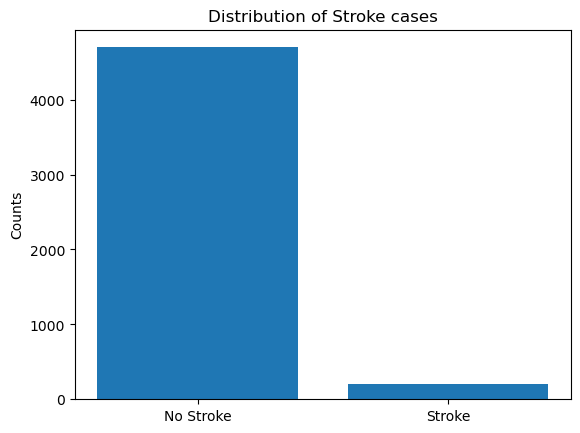

In [14]:
#create bargraphs to visualize the counts
plt.bar(stroke_counts.index,stroke_counts)
plt.xticks([0,1],['No Stroke','Stroke'])
plt.ylabel('Counts')
plt.title('Distribution of Stroke cases')
plt.show()

# Building the Machine learning model

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
#Split the data
X = df.drop('stroke',axis=1)
y = df['stroke']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train the decision tree classifier 
cls = DecisionTreeClassifier(random_state=42)
cls.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Make predictions o the test sets
y_pred = cls.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.90


# Visualize the Machine learning model

In [21]:
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

<function matplotlib.pyplot.show(close=None, block=None)>

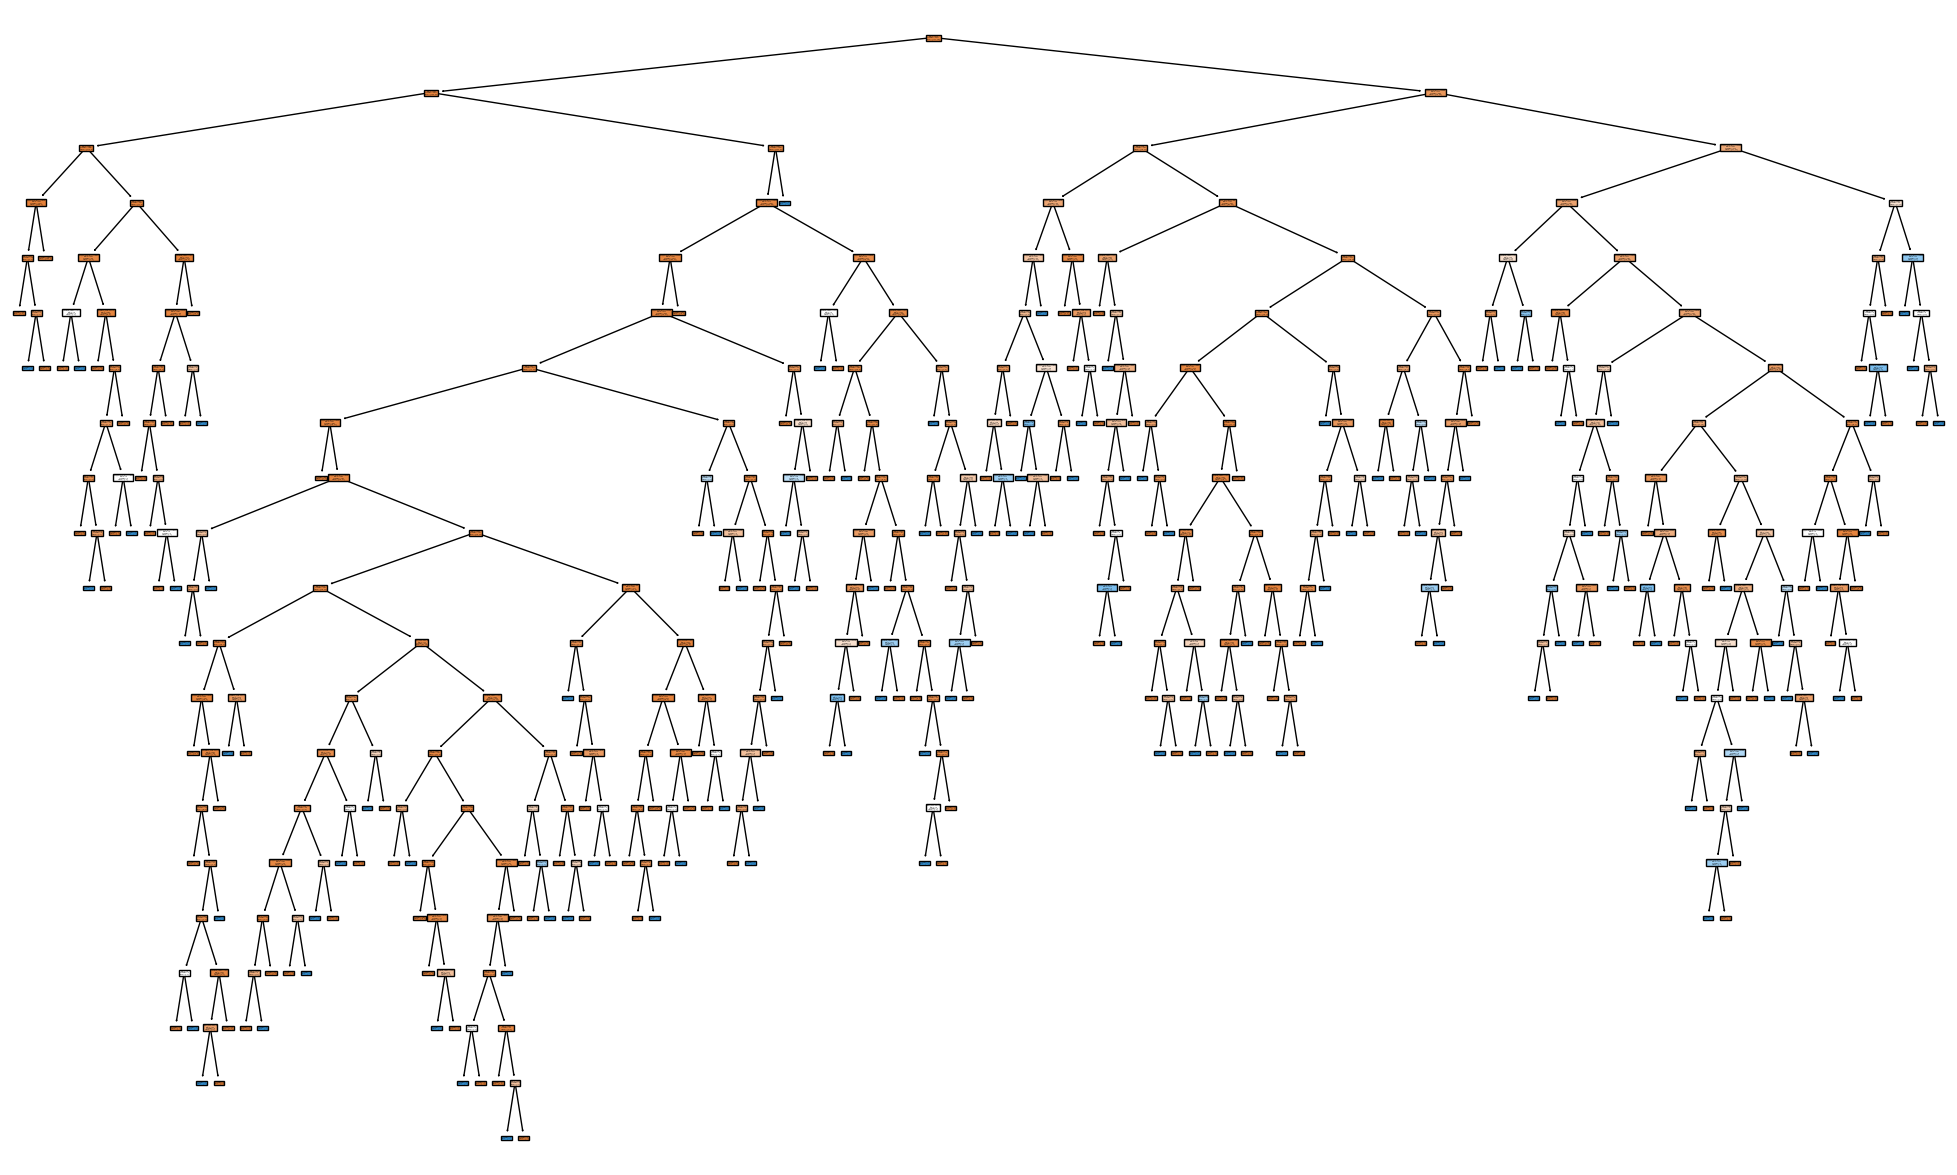

In [50]:
plt.figure(figsize=(25,15))
plot_tree(cls,filled=True,feature_names=X.columns)
plt.show